# Exploratory Data Analysis

Breve Explicação sobre notebook

## Summary??

## 1. Import Libraries and Utilities

In [12]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns

In [57]:
# Import utilities
from EDA.age import calc_age
from EDA.educ import education
from EDA.data_load import data_load
from EDA.cat_num import categorical_numerical
from EDA.bar_chart import bar_chart
from EDA.freq_cat import frequency_categorical
from EDA.gender import cat_to_binary
from EDA.boxplot import boxplot

## 2. Import Dataset

In [14]:
# Import dataset
cust_info = data_load('.\\Data\\Customer Info Dataset.csv')

In [15]:
# See dataset
cust_info.head()

,customer_id,customer_name,customer_gender,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,...,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude
0,4239,Sara Moscowitz,female,09/10/1999 03:11 PM,0.0,0.0,0.0,2.0,91.0,20.0,...,53.0,48.0,47.0,105.0,85.0,0.192154,2017.0,NaN,38.754263,-9.163397
1,19330,Donald Robertson,male,06/26/1981 10:58 PM,1.0,0.0,0.0,2.0,197.0,5958.0,...,86.0,80.0,45.0,1964.0,85.0,0.098647,2015.0,NaN,38.777761,-9.156197
2,2272,Phd. Felicia Bradshaw,female,01/31/1987 09:08 AM,1.0,1.0,0.0,20.0,397.0,20.0,...,204.0,170.0,46.0,5.0,408.0,0.497251,2008.0,NaN,38.785329,-9.127113
3,25288,Emma Williams,female,06/17/1942 12:02 AM,3.0,4.0,1.0,2.0,5282.0,237.0,...,1081.0,1068.0,617.0,1078.0,1956.0,0.206713,2010.0,NaN,38.744086,-9.156589
4,12829,Hilda Huerta,female,01/31/2000 11:43 AM,0.0,0.0,0.0,2.0,82.0,22.0,...,39.0,39.0,48.0,103.0,83.0,0.200625,2015.0,NaN,38.756024,-9.162970


## 3. Check duplicates 

In [16]:
# Search for duplicated 'customer_id'
cust_info['customer_id'].duplicated().sum()

0

Não sei o que escrever

In [17]:
# Set 'customer_id' as index
cust_info = cust_info.set_index('customer_id')

## 4. Check Data Types 

In [18]:
cust_info.dtypes

customer_name                               object
customer_gender                             object
customer_birthdate                          object
kids_home                                  float64
teens_home                                 float64
number_complaints                          float64
distinct_stores_visited                    float64
lifetime_spend_groceries                   float64
lifetime_spend_electronics                 float64
typical_hour                               float64
lifetime_spend_vegetables                  float64
lifetime_spend_nonalcohol_drinks           float64
lifetime_spend_alcohol_drinks              float64
lifetime_spend_meat                        float64
lifetime_spend_fish                        float64
lifetime_spend_hygiene                     float64
lifetime_spend_videogames                  float64
lifetime_total_distinct_products           float64
percentage_of_products_bought_promotion    float64
year_first_transaction         

## 5. Missing Values 

In [19]:
# Search for missing data
cust_info.isna().sum()

customer_name                                  0
customer_gender                                0
customer_birthdate                             0
kids_home                                      0
teens_home                                     0
number_complaints                              0
distinct_stores_visited                        0
lifetime_spend_groceries                       0
lifetime_spend_electronics                     0
typical_hour                                   0
lifetime_spend_vegetables                      0
lifetime_spend_nonalcohol_drinks               0
lifetime_spend_alcohol_drinks                  0
lifetime_spend_meat                            0
lifetime_spend_fish                            0
lifetime_spend_hygiene                         0
lifetime_spend_videogames                      0
lifetime_total_distinct_products               0
percentage_of_products_bought_promotion        0
year_first_transaction                         0
loyalty_card_number 

## 6. Summary Statistics 

In [20]:
# Get to know the dataset
cust_info.describe().T

,count,mean,std,min,25%,50%,75%,max
kids_home,30000.0,1.146700e+00,1.234111,0.000000e+00,0.000000,1.000000,1.000000,10.000000
teens_home,30000.0,5.129333e-01,0.912502,0.000000e+00,0.000000,0.000000,1.000000,9.000000
number_complaints,30000.0,7.643667e-01,0.836341,0.000000e+00,0.000000,1.000000,1.000000,9.000000
distinct_stores_visited,30000.0,6.120767e+00,6.511410,0.000000e+00,2.000000,3.000000,8.000000,21.000000
lifetime_spend_groceries,30000.0,3.978634e+03,5280.641466,0.000000e+00,220.000000,950.000000,5253.000000,18852.000000
lifetime_spend_electronics,30000.0,9.652388e+02,1755.323397,1.058527e+00,45.000000,194.000000,721.000000,6603.000000
typical_hour,30000.0,-inf,NaN,-inf,9.000000,14.000000,20.000000,23.000000
lifetime_spend_vegetables,30000.0,5.642078e+02,481.819086,1.000000e+00,247.000000,425.000000,785.000000,1568.000000
lifetime_spend_nonalcohol_drinks,30000.0,6.287501e+02,496.346400,0.000000e+00,244.000000,425.000000,949.000000,1671.000000
lifetime_spend_alcohol_drinks,30000.0,3.793445e+02,236.206400,0.000000e+00,193.000000,419.000000,537.000000,1048.000000


## 7. Identify Anomalies

## 8. Identify Outliers

## 9. Feature Engineering

Date of birth to age

In [21]:
# Calculate age of each customer
calc_age(cust_info)
cust_info['age']

customer_id
4239     23
19330    41
2272     36
25288    80
12829    23
         ..
625      48
26447    37
182      22
13768    64
2570     79
Name: age, Length: 30000, dtype: int32

Level of education in the variable name

In [22]:
# See pattern in names
cust_info['customer_name'].head(20)

customer_id
4239              Sara Moscowitz
19330           Donald Robertson
2272       Phd. Felicia Bradshaw
25288              Emma Williams
12829               Hilda Huerta
12267         Bsc. Anthony Brown
10548       Phd. Kimberly Milton
11199               Robert Smith
26762               Alan Lambert
457            Msc. Pamela Moser
15901              Sabra Terrell
8267           Denise Standridge
22941                 John Abreu
2803     Bsc. Kimberly Whitehead
20623             Cedrick Villar
2345          Bsc. Henry Schultz
19722                 Ann Murphy
17585          George Degasperis
1702           Phd. Robert Pires
15914             Fannie Onisick
Name: customer_name, dtype: object

In [23]:
# See level of education of each customer
# based on their name
cust_info['education'] = cust_info['customer_name'].apply(education)
cust_info['education']

customer_id
4239       HS
19330      HS
2272     Phd.
25288      HS
12829      HS
         ... 
625      Phd.
26447      HS
182        HS
13768      HS
2570     Phd.
Name: education, Length: 30000, dtype: object

Transform `customer_gender` into a binary variable

In [24]:
cust_info = cat_to_binary(cust_info, 'customer_gender', 'female')
cust_info

Relation between customers and each loyalty card

In [54]:
cust_per_card, count_cards =  frequency_categorical(cust_info, 'loyalty_card_number')

## 10. Visualize Data

In [62]:
# Change default of plot size
rcParams['figure.figsize'] = 15, 10

Separate numeric and categorical variables

In [53]:
cat_cust_info, num_cust_info = categorical_numerical(
    cust_info,
    ['customer_name'],
    [
        'customer_birthdate', 'loyalty_card_number',
        'latitude', 'longitude'
    ]
)

In [30]:
# See categorical DataFrame
cat_cust_info

,education
customer_id,
4239,HS
19330,HS
2272,Phd.
25288,HS
12829,HS
...,...
625,Phd.
26447,HS
182,HS


In [31]:
# See numerical DataFrame
num_cust_info

,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,age,female
customer_id,,,,,,,,,,,,,,,,,,,
4239,0.0,0.0,0.0,2.0,91.0,20.0,22.0,22.0,195.0,964.0,53.0,48.0,47.0,105.0,85.0,0.192154,2017.0,23,1
19330,1.0,0.0,0.0,2.0,197.0,5958.0,21.0,20.0,1435.0,434.0,86.0,80.0,45.0,1964.0,85.0,0.098647,2015.0,41,0
2272,1.0,1.0,0.0,20.0,397.0,20.0,9.0,310.0,379.0,222.0,204.0,170.0,46.0,5.0,408.0,0.497251,2008.0,36,1
25288,3.0,4.0,1.0,2.0,5282.0,237.0,12.0,499.0,873.0,460.0,1081.0,1068.0,617.0,1078.0,1956.0,0.206713,2010.0,80,1
12829,0.0,0.0,0.0,2.0,82.0,22.0,21.0,9.0,172.0,856.0,39.0,39.0,48.0,103.0,83.0,0.200625,2015.0,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,0.0,0.0,1.0,2.0,209.0,5474.0,20.0,18.0,1435.0,521.0,21.0,11.0,57.0,1984.0,112.0,0.096366,2008.0,48,1
26447,0.0,0.0,0.0,3.0,185.0,1066.0,15.0,267.0,276.0,287.0,47.0,41.0,50.0,197.0,22.0,0.118998,2014.0,37,0
182,0.0,0.0,0.0,2.0,83.0,23.0,23.0,23.0,189.0,921.0,55.0,52.0,51.0,94.0,77.0,0.199432,2016.0,22,0


### Numerical Data

Bar chart with number of customers per loyalty card

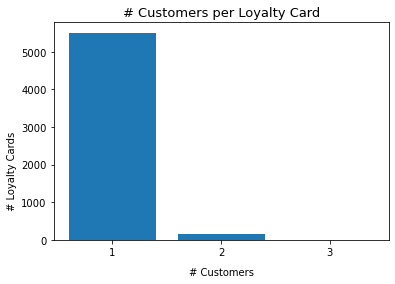

In [55]:
bar_chart(cust_per_card, count_cards,
          '# Customers', '# Loyalty Cards', 
          '# Customers per Loyalty Card')

In [59]:
spend_groups = num_cust_info[['lifetime_spend_vegetables',
                        'lifetime_spend_nonalcohol_drinks','lifetime_spend_alcohol_drinks','lifetime_spend_meat',
                        'lifetime_spend_hygiene','lifetime_spend_videogames']]
fish_group = num_cust_info['lifetime_spend_fish']
groc_group = num_cust_info['lifetime_spend_groceries']
elec_group = num_cust_info['lifetime_spend_electronics']

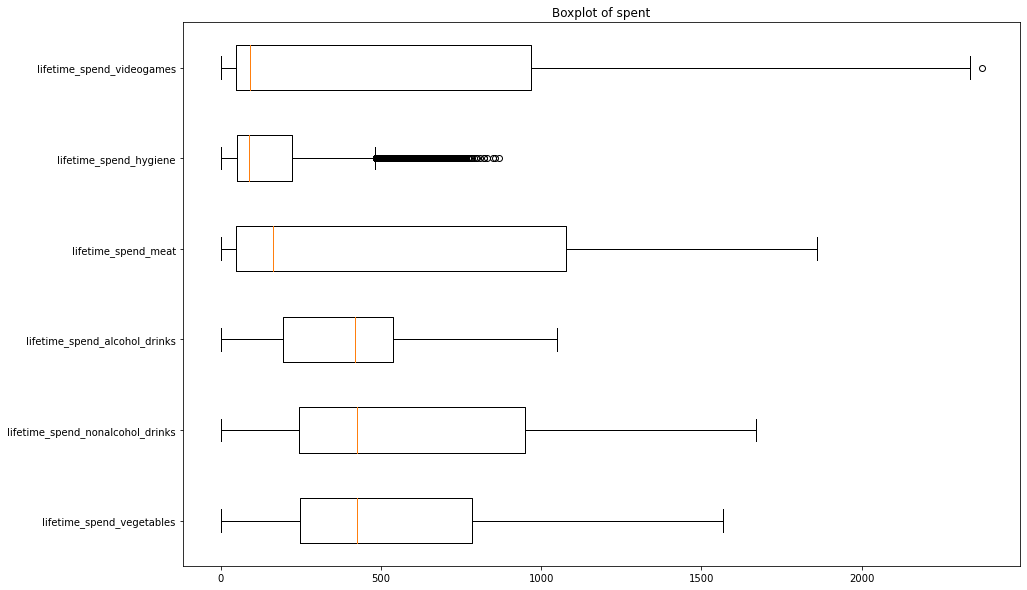

In [63]:
boxplot(spend_groups, 
        ['lifetime_spend_vegetables',
        'lifetime_spend_nonalcohol_drinks','lifetime_spend_alcohol_drinks','lifetime_spend_meat',
        'lifetime_spend_hygiene','lifetime_spend_videogames'],
       'spent')

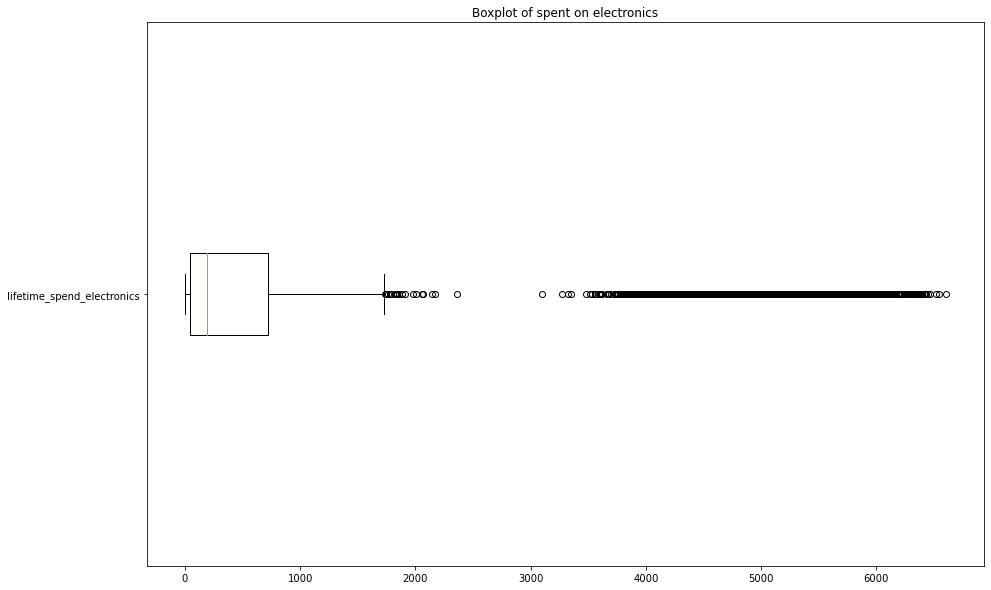

In [65]:
boxplot(elec_group,
       ['lifetime_spend_electronics'],
       'spent on electronics')

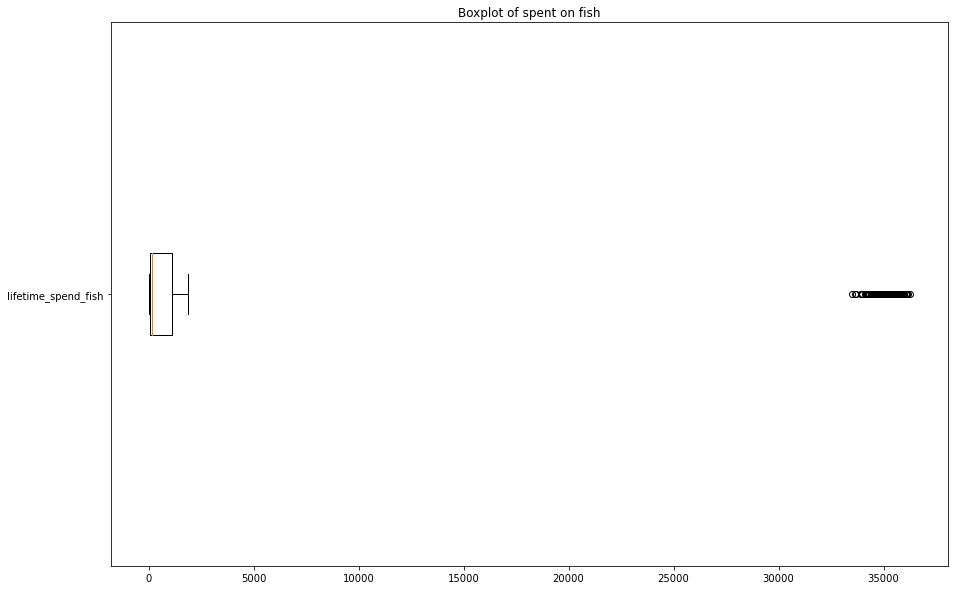

In [66]:
boxplot(fish_group,
       ['lifetime_spend_fish'],
       'spent on fish')

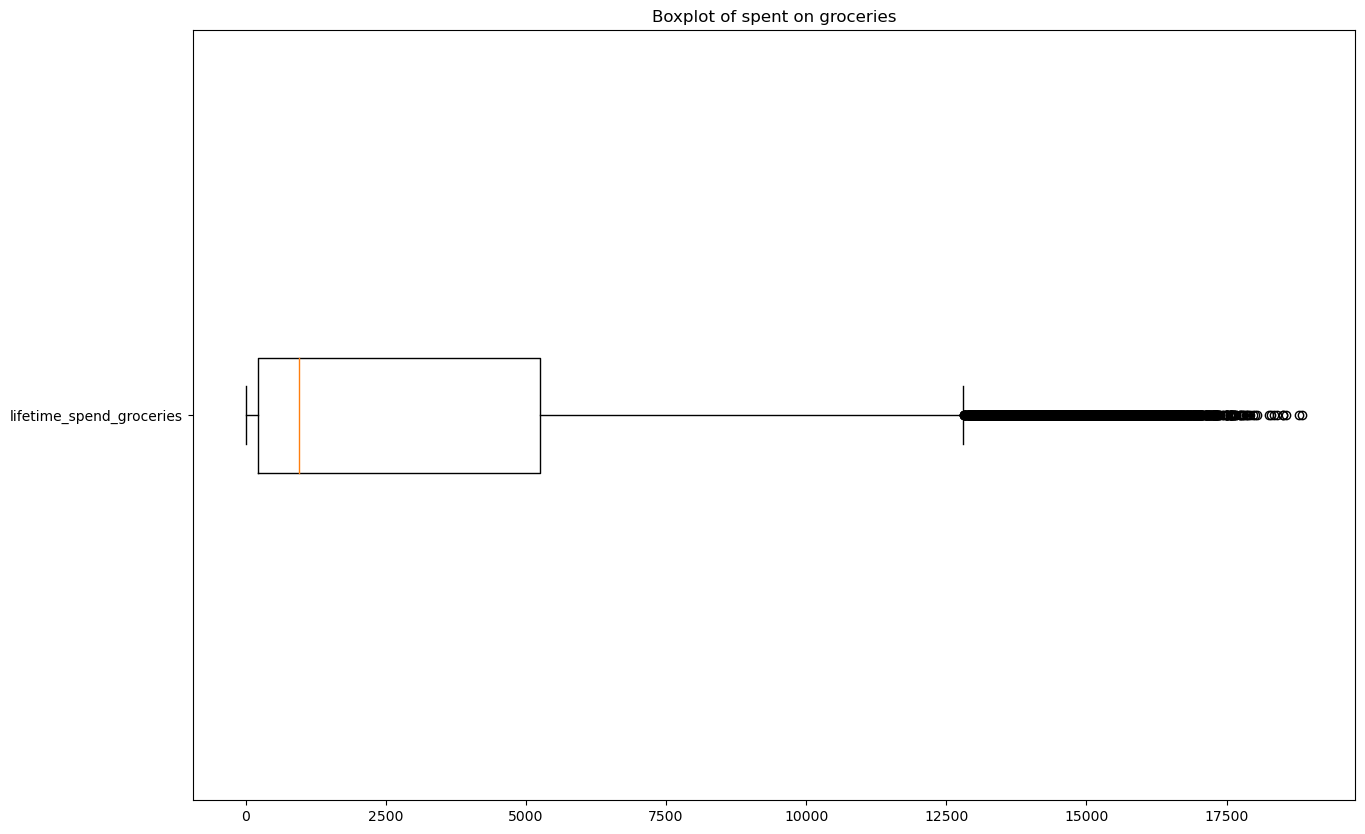

In [107]:
plt.boxplot(groc_group,vert=False,labels=['lifetime_spend_groceries'])
plt.title('Boxplot of spent on groceries')
plt.show()

In [ ]:
#  no relatorio explicar porque é que separamos as coisas, foi porque nao dava para visualizar bem 

In [ ]:
## fazer bar chart de compliants, tipo por cada customer porque vai haver malta com muitos complaints

### Categorical Data

## 11. Correlation

<Axes: >

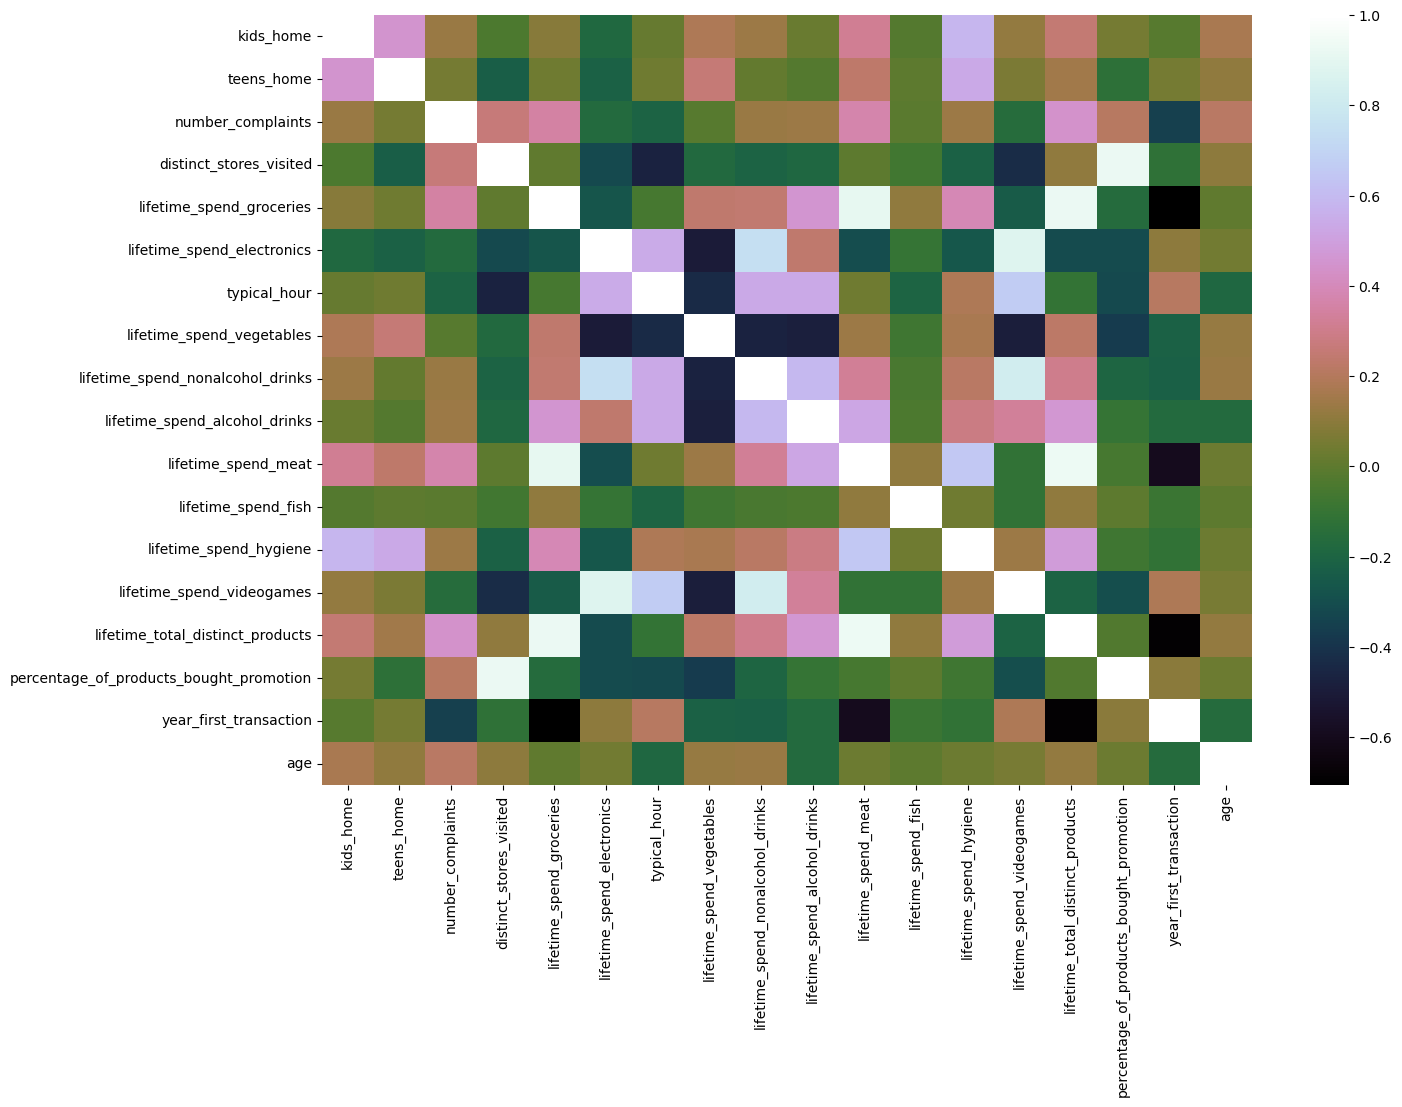

In [45]:
corr = num_cust_info.drop(['female'], axis=1).corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap='cubehelix')

## 12. Explore

## 13.Export Datasets

Dataset with outliers

Dataset without outliers

Dataset with outliers only

## 14. Conclusion